In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [16]:
training_data = datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=ToTensor())
test_data = datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=False,
    download=True,
    transform=ToTensor())

In [17]:
trainloader = torch.utils.data.DataLoader(training_data, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(test_data, batch_size=4,
                                        shuffle=False, num_workers=2)


Visualizing Dataset

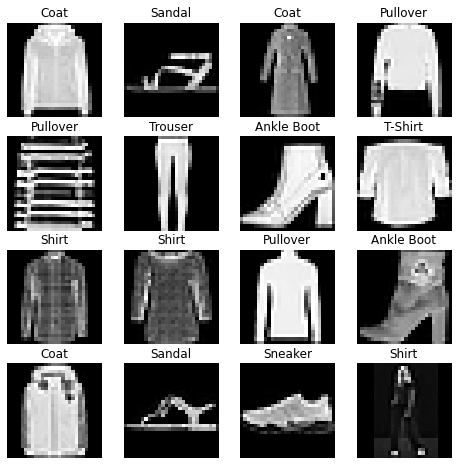

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [6]:
from torch import nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [7]:
net = Net().to(device)

In [9]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [26]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [31]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [32]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, net, loss_fn, optimizer)
    test_loop(testloader, net, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 0.823569  [    0/60000]
loss: 1.186782  [40000/60000]
Test Error: 
 Accuracy: 55.5%, Avg loss: 0.306323 

Epoch 2
-------------------------------
loss: 2.038322  [    0/60000]
loss: 1.163065  [40000/60000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 0.303523 

Epoch 3
-------------------------------
loss: 1.760614  [    0/60000]
loss: 1.179534  [40000/60000]
Test Error: 
 Accuracy: 55.9%, Avg loss: 0.301269 

Epoch 4
-------------------------------
loss: 1.665886  [    0/60000]
loss: 0.856653  [40000/60000]
Test Error: 
 Accuracy: 56.2%, Avg loss: 0.300075 

Epoch 5
-------------------------------
loss: 0.637646  [    0/60000]
loss: 1.608952  [40000/60000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 0.299413 

Done!
